

---


# **Workshop Fábrica de Software - Desafio 03**
## *Python para Análise de Dados*
### Djalma Araújo Rangel


---


---

###**IMPORTAÇÃO DOS DADOS**

In [37]:
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns

### **CARREGAMENTO DOS DADOS**

In [2]:
# Carregamento e visualização de uma amostra dos dados com o intuito de conhecer as colunas e os conteúdos de cada uma delas
df = pd.read_csv('/content/dados.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **OBSERVAÇÃO DAS CARACTERÍSTICAS DO DATAFRAME**

In [3]:
# Conhecendo o formato da tabela (núm_linhas, núm_colunas)
df.shape

(1000, 8)

Observa-se que foram inseridos 1000 registros.

In [4]:
# Observando as características do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Por meio do da função df.info(), verifica-se que nenhuma das colunas possui valores nulos.
Acrescenta-se ainda que apenas três colunas apresentam dados no formato de valores inteiro: a pontuação de cada aluno em matemática, leitura e escrita. O restante das colunas (cinco) apresenta dados em forma de texto (object).

### **ANÁLISE DESCRITIVA DOS DADOS**

In [5]:
# Fazendo uma análise descritiva sobre os dados
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Pontuação em Matemática (math score)
- A média da pontuação dos alunos é 66,08
- O desvio-padrão é 15,16
- O Menor pontuação foi 0,0 e a maior foi 100,0
- Os 25% melhores alunos tiveram nota superior a 77,0
- Os 25% piores alunos tiveram nota inferior ou igual a 57,0


#### Pontuação em Leitura (reading score)
- A média da pontuação dos alunos é 69,17
- O desvio-padrão é 14,60
- O Menor pontuação foi 14,6 e a maior foi 100,0
- Os 25% melhores alunos tiveram nota superior a 79,0
- Os 25% piores alunos tiveram nota inferior ou igual a 59,0

#### Pontuação em Escrita (writing score)
- A média da pontuação dos alunos é 68,05
- O desvio-padrão é 15,20
- O Menor pontuação foi 10,0 e a maior foi 100,0
- Os 25% melhores alunos tiveram nota superior a 79,0
- Os 25% piores alunos tiveram nota inferior ou igual a 57,75

#### Análise com base nos dados descritivos
- O desempenho médio dos alunos foi melhor em Leitura
- A variação do desempenho dos alunos foi maior em Escrita
- A maior amplituda de dados aconteceu em Matemática
- Os melhores desempenhos (acima do 75º percentil) aconteceram em Leitura e Escrita (notas superiores a 79,0)
- Os piores desempenhos (1º quartil) aconteceram em Matemática (notas inferiores a 57,0)

### **AGRUPANDO OS DADOS**

#### Agrupamento 1 - Pontuação média por Raça/etnia

In [60]:
# Criando novo dataframe com o agrupamento dos dados por Raça/etnia
df_grupo1 = df.groupby('race/ethnicity')[['math score', 'writing score','reading score']].mean()
df_grupo1.sort_values('math score')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.629213,62.674157,64.674157
group B,63.452632,65.600000,67.352632
group C,64.463950,67.827586,69.103448
group D,67.362595,70.145038,70.030534
group E,73.821429,71.407143,73.028571


<Axes: ylabel='race/ethnicity'>

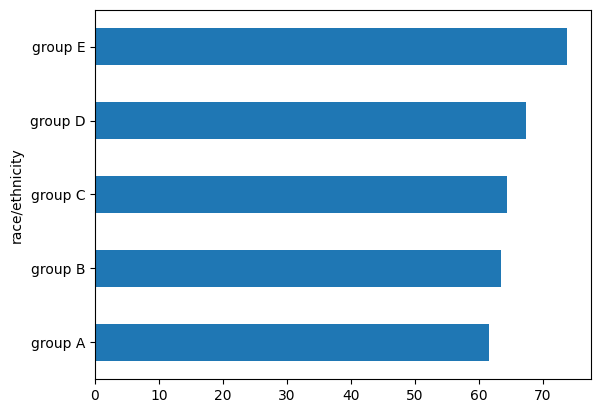

In [61]:
# Criando gráfico de barras informando a pontuação média dos alunos em Matemática agrupados por Raça/etnia
df_grupo1['math score'].plot(kind = 'barh')

Ao agrupar por Raça/etnia, entende-se que em:
- *Matemática*: Menor média foi no grupo A e maior média no Grupo E
- *Escrita*: Menor média foi no grupo A e maior média no Grupo E
- *Leitura*: Menor média foi no grupo A e maior média no Grupo E

Ou seja, o Grupo E obteve melhor desempenho médio em todas as áreas, enquanto o Grupo A teve o pior desempenho em todas as áreas.

#### Agrupamento 2 - Pontuação média por Nível de Escolaridade dos pais

In [62]:
# Criando novo dataframe com o agrupamento dos dados por Nível de Escolaridade
df_grupo2 = df.groupby('parental level of education')[['math score', 'writing score','reading score']].mean()
df_grupo2.sort_values('writing score')

,math score,writing score,reading score
parental level of education,,,
high school,62.137755,62.448980,64.704082
some high school,63.497207,64.888268,66.938547
some college,67.128319,68.840708,69.460177
associate's degree,67.882883,69.896396,70.927928
bachelor's degree,69.389831,73.381356,73.000000
master's degree,69.745763,75.677966,75.372881


<Axes: ylabel='parental level of education'>

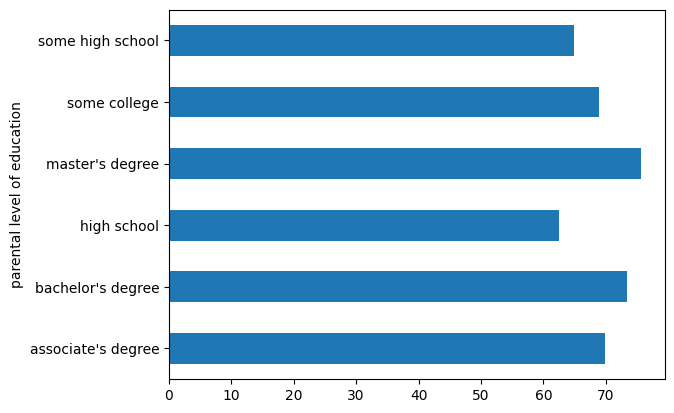

In [70]:
# Criando gráfico de barras informando a pontuação média dos alunos em Escrita agrupados por Raça/etnia
df_grupo2['writing score'].plot(kind = 'barh')

Ao agrupar por Nível de Escolarida, entende-se que em:

**Matemática**:
- Menor média foi obtida pelos alunos cujo os pais possuem High school (ensino médio).
- Maior média foi obtida obtida por aqueles cujo os pais possuem Mestrado.

**Escrita**:
- Menor média foi obtida pelos alunos cujo os pais possuem High school (ensino médio).
- Enquanto a maior nota foi obtida obtida por aqueles cujo os pais possuem Mestrado.

**Leitura**:
- Menor média foi obtida pelos alunos cujo os pais possuem High school (ensino médio).
- Maior média foi obtida obtida por aqueles cujo os pais possuem Mestrado.

Ou seja, os melhores desempenhos foram obtidos por alunos cujo os pais obtem Mestrado e os piores desempenhos foram obtidos por alunos cujos os pais obtem ensino médio (High school).

#### Agrupamento 3 - Pontuação média por Participação em curso Preparatório

In [64]:
# Criando novo dataframe com o agrupamento dos dados por Participação em curso Preparatório
df_grupo3 = df.groupby('test preparation course')[['math score', 'writing score','reading score']].mean()
df_grupo3.sort_values('reading score')

,math score,writing score,reading score
test preparation course,,,
none,64.077882,64.504673,66.534268
completed,69.695531,74.418994,73.893855


<Axes: ylabel='test preparation course'>

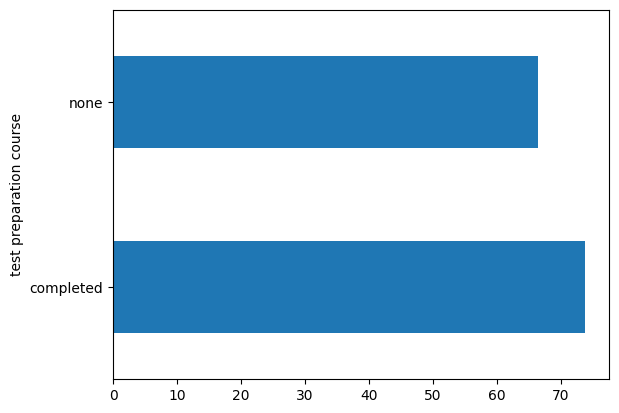

In [68]:
df_grupo3['reading score'].plot(kind = 'barh')

Ao agrupar por Participação em curso Preparatório para os testes, verifica-se que em:

- O **pior desempenho médio em todas as áreas** (Matemática, Leitura e Escrita) foi obtido por alunos que não participaram do curso Preparatório para os testes.

- E o **melhor desempenho médio em todas as áreas** (Matemática, Leitura e Escrita) foi obtido por alunos que participaram e completaram o curso Preparatório para os testes.